### Hello

In [1]:
import scipy

c:\Users\Admin\anaconda3\lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")



Circuit string: R_1-CPE_1
Fit: True

Initial guesses:
    R_1 = 1.00e+00 [Ohm]
  CPE_1_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE_1_1 = 1.00e+00 []

Fit parameters:
    R_1 = 1.00e+02  (+/- 3.97e-15) [Ohm]
  CPE_1_0 = 1.00e-04  (+/- 9.00e-23) [Ohm^-1 sec^a]
  CPE_1_1 = 9.00e-01  (+/- 6.15e-19) []



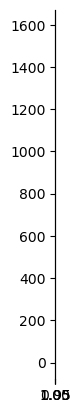

In [2]:
from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist, plot_bode
from impedance.models.circuits.elements import element
import numpy as np
import matplotlib.pyplot as plt

@element(num_params=3,units=["Ohm","","",""])
def TLMuni(p,f):
    R,Q,alpha=p[0],p[1],p[2]
    w=2*np.pi*f
    Z=np.coth(np.sqrt(R*Q*1j*w))
    return Z


f=np.logspace(-1,3,100)
c1=CustomCircuit(initial_guess=[100,1e-4,0.9],circuit="R_1-CPE_1")

c2=CustomCircuit(initial_guess=[100,1e-5,1,100,1e-4,0.9],circuit="TLMuni_1-R_1-CPE_1")

z_pred=c1.predict(frequencies=f)
c_to_fit=CustomCircuit(initial_guess=[1,1e-3,1],circuit="R_1-CPE_1")
zpred_fit=c_to_fit.predict(frequencies=f)

fig, ax=plt.subplots()
ax.plot(np.real(zpred_fit),-np.imag(zpred_fit))
ax.set_aspect("equal")

c_to_fit.fit(impedance=z_pred,frequencies=f,bounds=((0,0,0.5),(np.inf,np.inf,1)))
print(c_to_fit)